In [ ]:
import pandas as pd
df = pd.read_excel('datas.xls')
df = df.drop(columns=['no'])
df

,questions,category0
0,What films featured the character Popeye Doyle ?,ENTITY
1,What fowl grabs the spotlight after the Chines...,ENTITY
2,What is considered the costliest disaster the ...,ENTITY
3,What articles of clothing are tokens in Monopo...,ENTITY
4,What 's the second-most-used vowel in English ?,ENTITY
...,...,...
3295,What European country 's monarchy was restored...,LOCATION
3296,What country is home to Heineken beer ?,LOCATION
3297,What is the highest continent ?,LOCATION
3298,Where can I find information on becoming a jou...,LOCATION


In [ ]:
category = pd.get_dummies(df.category0)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='category0')
df_baru

,questions,ENTITY,HUMAN,LOCATION
0,What films featured the character Popeye Doyle ?,1,0,0
1,What fowl grabs the spotlight after the Chines...,1,0,0
2,What is considered the costliest disaster the ...,1,0,0
3,What articles of clothing are tokens in Monopo...,1,0,0
4,What 's the second-most-used vowel in English ?,1,0,0
...,...,...,...,...
3295,What European country 's monarchy was restored...,0,0,1
3296,What country is home to Heineken beer ?,0,0,1
3297,What is the highest continent ?,0,0,1
3298,Where can I find information on becoming a jou...,0,0,1


In [ ]:
tanya = df_baru['questions'].values
label = df_baru[['ENTITY', 'HUMAN', 'LOCATION']].values

In [ ]:
print(type(tanya))
print(type(label))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split
tanya_latih, tanya_test, label_latih, label_test = train_test_split(tanya, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(tanya_latih) 

 
sekuens_latih = tokenizer.texts_to_sequences(tanya_latih)
sekuens_test = tokenizer.texts_to_sequences(tanya_test)
 
padded_latih = pad_sequences(sekuens_latih, 
                                      padding='post',
                                      maxlen=10,
                                      truncating='post') 
padded_test = pad_sequences(sekuens_test, 
                                      padding='post',
                                      maxlen=10,
                                      truncating='post') 

In [ ]:
print("ini sekuens latih =",(sekuens_latih))
print("ini sekuens test =",(sekuens_test))
print("ini label latih =",(label_latih))
print("ini label test =",(label_test))

ini sekuens latih = [[3, 234, 19, 630, 2086, 2087, 2088, 15], [21, 1241, 78, 10, 1242, 11, 2, 235, 2089, 148, 1243, 9, 2090], [3, 9, 2, 189, 4, 2091, 506, 2092], [3, 25, 19, 2, 837, 631, 1244, 11, 34, 1245], [3, 5, 2, 632, 56, 6, 2, 53, 2093, 1246, 411, 14, 2, 236, 2094, 13, 2095, 349], [12, 8, 25, 27, 5, 2096, 8, 2097, 2098, 1247, 190], [21, 633, 36, 2, 23, 2099], [3, 31, 2, 235, 97, 634, 2100], [7, 19, 2101, 266, 2102, 11, 292, 2, 350, 4, 8, 41], [12, 8, 122, 351, 838, 352], [12, 8, 1248, 54, 1249, 2103, 36, 1250, 15], [14, 19, 158, 4, 2, 2104, 98], [3, 38, 507, 4, 635, 13, 1251, 10, 2, 2105, 6, 2, 1252, 4, 1253], [3, 59, 107, 74, 293, 237, 8, 2106, 1254, 11, 2107, 44, 1255, 6, 2, 2108], [3, 26, 5, 208, 30, 636, 140, 159], [3, 9, 2, 130, 160, 353, 354, 6, 91], [7, 80, 22, 57, 191], [2, 294, 141, 161, 5, 117, 412, 3, 26], [7, 10, 2, 41, 4, 2109, 637], [7, 118, 3, 2110, 2111, 839, 2, 2112, 37, 295, 2113, 16], [7, 638, 2, 2114, 81, 2115, 2116, 10, 639, 6, 413], [3, 296, 5, 2117, 92, 91,

In [ ]:
#Download Pre-Trained word Embedding GloVe : https://nlp.stanford.edu/projects/glove/
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-08-15 18:26:43--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-08-15 18:26:44--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-08-15 18:26:44--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove

In [ ]:
!unzip /content/glove.6B.zip

Archive:  /content/glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y[
error:  invalid response [[y[]
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]
error:  invalid response [[y]]
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]
error:  invalid response [[y]]
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]
error:  invalid response [[y]]
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]
error:  invalid response [[y]]
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]
error:  invalid response [[y]]
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]
error:  invalid response [[y]]
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: glove.6B.50d.txt        
replace glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  in

In [ ]:
import numpy as np
embeddings_index = {};
with open('/content/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs;

In [ ]:
embeddings_matrix = np.zeros((len(tokenizer.word_index)+1, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector

In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(tokenizer.word_index)+1, 100, input_length=15, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences='true')),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.001),
    bias_regularizer=regularizers.l2(0.0001),
    activity_regularizer=regularizers.l2(0.00001), activation='relu'),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 15, 100)           555600    
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 15, 128)           84480     
_________________________________________________________________
dropout_8 (Dropout)          (None, 15, 128)           0         
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 128)               98816     
_________________________________________________________________
dense_20 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_22 (Dense)             (None, 3)                

In [ ]:
ACCURACY_THRESHOLD = 0.90

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
      if(logs.get('val_accuracy') >= ACCURACY_THRESHOLD):   
        print("\nVal_Akurasi Telah mencapai %2.2f%% " %(ACCURACY_THRESHOLD*100))
        self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2,
                    callbacks=[callbacks])

Epoch 1/30
83/83 - 5s - loss: 13.6714 - accuracy: 0.6985 - val_loss: 1.8257 - val_accuracy: 0.7485
Epoch 2/30
83/83 - 3s - loss: 0.8099 - accuracy: 0.8485 - val_loss: 0.5767 - val_accuracy: 0.8530
Epoch 3/30
83/83 - 3s - loss: 0.4912 - accuracy: 0.8837 - val_loss: 0.5223 - val_accuracy: 0.8773
Epoch 4/30
83/83 - 3s - loss: 0.4413 - accuracy: 0.9011 - val_loss: 0.5375 - val_accuracy: 0.8758
Epoch 5/30
83/83 - 3s - loss: 0.3684 - accuracy: 0.9197 - val_loss: 0.5102 - val_accuracy: 0.8727
Epoch 6/30
83/83 - 3s - loss: 0.3621 - accuracy: 0.9273 - val_loss: 0.4493 - val_accuracy: 0.9000
Epoch 7/30
83/83 - 3s - loss: 0.3217 - accuracy: 0.9341 - val_loss: 0.4701 - val_accuracy: 0.8773
Epoch 8/30
83/83 - 3s - loss: 0.2532 - accuracy: 0.9557 - val_loss: 0.4894 - val_accuracy: 0.8848
Epoch 9/30
83/83 - 3s - loss: 0.2133 - accuracy: 0.9652 - val_loss: 0.4837 - val_accuracy: 0.8833
Epoch 10/30
83/83 - 3s - loss: 0.1994 - accuracy: 0.9727 - val_loss: 0.5316 - val_accuracy: 0.8864
Epoch 11/30
83/83 

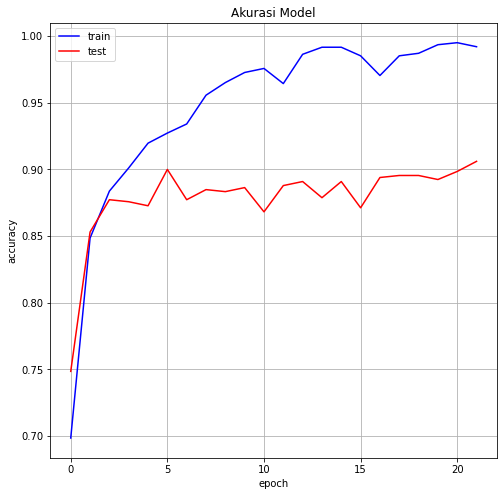

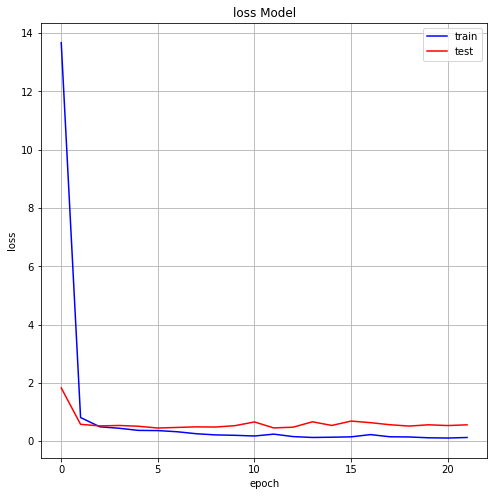

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.grid()
plt.plot(history.history['accuracy'],color='blue')
plt.plot(history.history['val_accuracy'],color='red')
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.figure(figsize=(8, 8))
plt.grid()
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='red')
plt.title('loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [ ]:
columns = []

for col in df_baru.columns:
  if col == "questions":
    pass
  else:
    columns.append(col)

In [ ]:
tebak = ["Who made the generator ac ?"]
tebak_seq = tokenizer.texts_to_sequences(tebak)
tebak_pad = pad_sequences(tebak_seq, maxlen=10)
tebak = model.predict(tebak_pad)
klasifikasi = columns

for label in klasifikasi:
  print( label, "confidence = ", tebak[0][klasifikasi.index(label)]*100, "%" )

print("\nPrediksi jenis pertanyaan = ", klasifikasi[np.argmax(tebak)])

ENTITY confidence =  0.2845973474904895 %
HUMAN confidence =  99.65971112251282 %
LOCATION confidence =  0.05569396307691932 %

Prediksi jenis pertanyaan =  HUMAN
